In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
housing_data = pd.read_csv('./data/cali_housing/california_housing_train.csv')

In [4]:
housing_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [5]:
#check all column headers
housing_data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

array([[<Axes: title={'center': 'median_income'}>]], dtype=object)

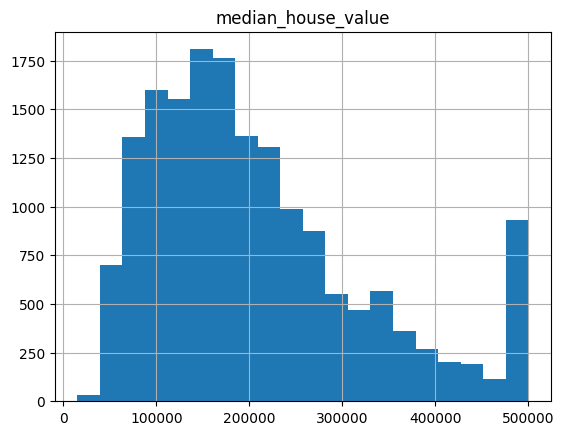

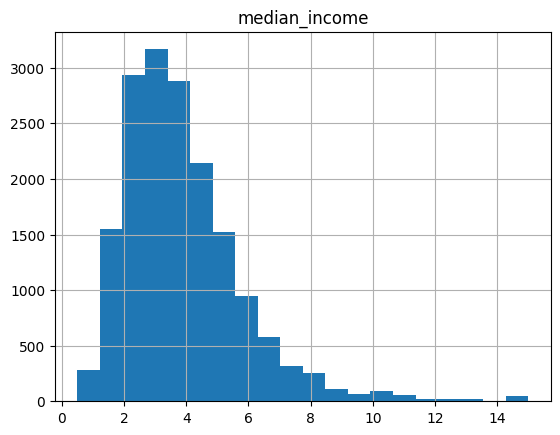

In [6]:
housing_data.hist('median_house_value', bins=20) #to find outliers
housing_data.hist('median_income',bins=20)

In [7]:
#descriptive statistics
housing_data_stats=housing_data.describe().T

In [8]:
housing_data_stats

,count,mean,std,min,25%,50%,75%,max
longitude,17000.0,-119.562108,2.005166,-124.3500,-121.790000,-118.4900,-118.000,-114.3100
latitude,17000.0,35.625225,2.137340,32.5400,33.930000,34.2500,37.720,41.9500
housing_median_age,17000.0,28.589353,12.586937,1.0000,18.000000,29.0000,37.000,52.0000
total_rooms,17000.0,2643.664412,2179.947071,2.0000,1462.000000,2127.0000,3151.250,37937.0000
total_bedrooms,17000.0,539.410824,421.499452,1.0000,297.000000,434.0000,648.250,6445.0000
population,17000.0,1429.573941,1147.852959,3.0000,790.000000,1167.0000,1721.000,35682.0000
households,17000.0,501.221941,384.520841,1.0000,282.000000,409.0000,605.250,6082.0000
median_income,17000.0,3.883578,1.908157,0.4999,2.566375,3.5446,4.767,15.0001
median_house_value,17000.0,207300.912353,115983.764387,14999.0000,119400.000000,180400.0000,265000.000,500001.0000


In [ ]:
#missing values
print(housing_data.isna().any())

#if missing values drop rows
dropped_data=housing_data.dropna(inplace=False,axis=0)

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms        False
population            False
households            False
median_income         False
median_house_value    False
dtype: bool


In [10]:
#Approach to missing data
#dropping
#average

In [11]:
#preprocessing to scale
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, StandardScaler

<Axes: >

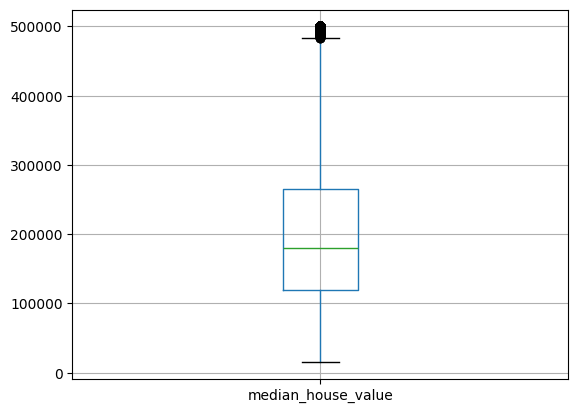

In [12]:
#box plots
#whisker 1.5 times iqr
housing_data.boxplot(['median_house_value']) #normalize to view

<Axes: >

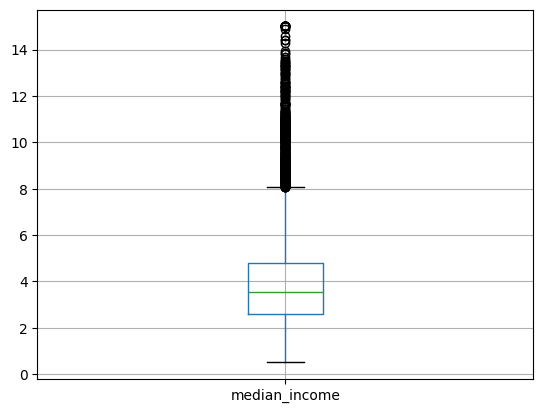

In [13]:
housing_data.boxplot(['median_income']) #normalize to view

array([[<Axes: title={'center': 'median_income'}>]], dtype=object)

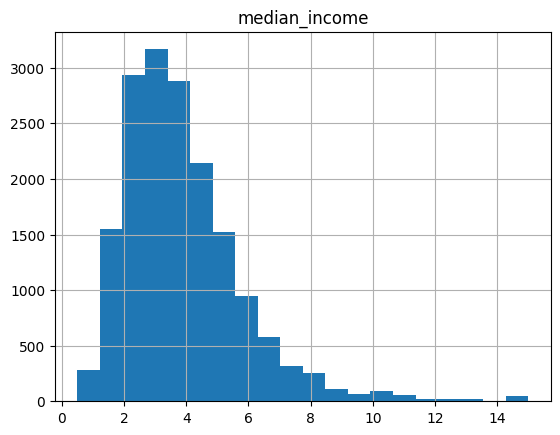

In [14]:
housing_data.hist('median_income',bins=20)

<Axes: xlabel='median_income', ylabel='median_house_value'>

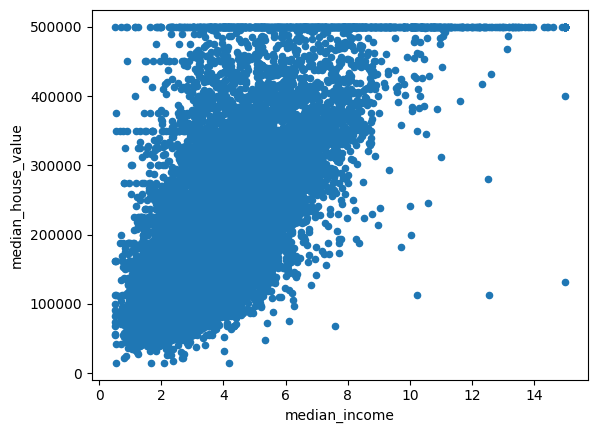

In [15]:
#correlation between income and house value
housing_data.plot(x='median_income', y='median_house_value',kind='scatter')

<Axes: xlabel='housing_median_age', ylabel='median_house_value'>

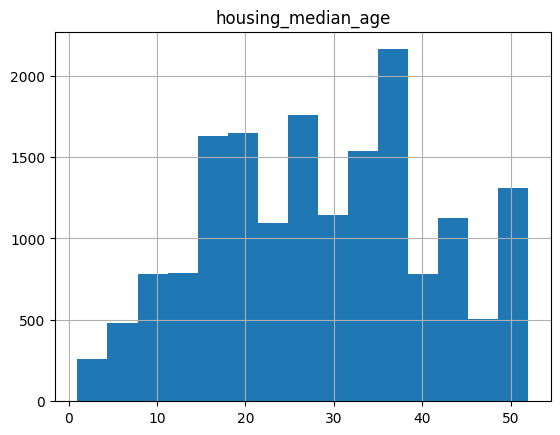

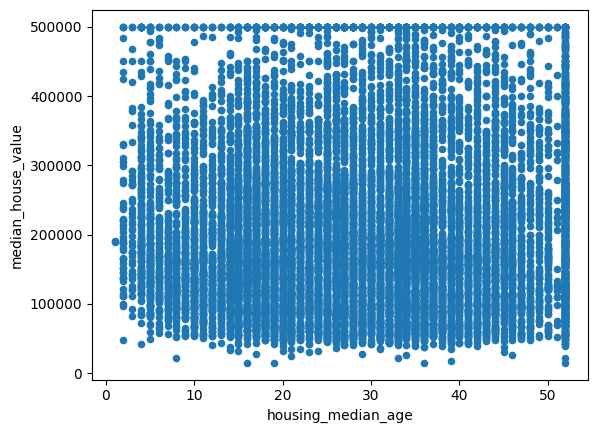

In [16]:
#check inheretence hypothesis
housing_data.hist('housing_median_age',bins=15)
housing_data.plot(x='housing_median_age',y='median_house_value',kind='scatter')

In [17]:
import seaborn as sns

<Axes: xlabel='median_income', ylabel='median_house_value'>

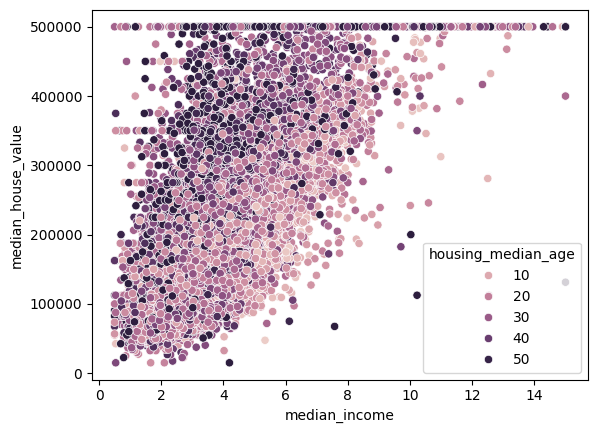

In [18]:
sns.scatterplot(data=housing_data,x='median_income', y='median_house_value',hue='housing_median_age')

<Axes: xlabel='longitude', ylabel='latitude'>

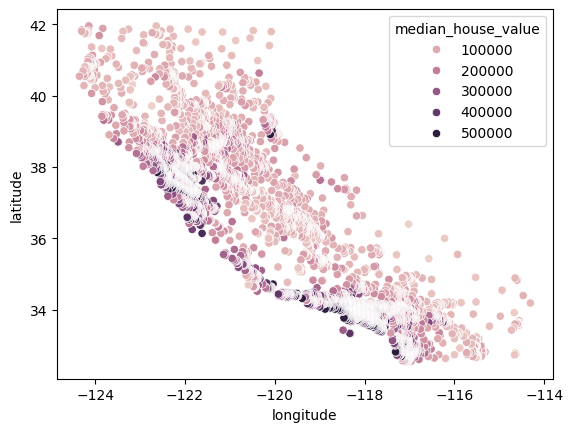

In [19]:
sns.scatterplot(data=housing_data,x='longitude',y='latitude',hue='median_house_value') #fix overlap

In [20]:
longitude_data = housing_data['longitude']
latitude_data = housing_data['latitude']

location_house_value = housing_data[['latitude','longitude','median_house_value']]
location_house_value

,latitude,longitude,median_house_value
0,34.19,-114.31,66900.0
1,34.40,-114.47,80100.0
2,33.69,-114.56,85700.0
3,33.64,-114.57,73400.0
4,33.57,-114.57,65500.0
...,...,...,...
16995,40.58,-124.26,111400.0
16996,40.69,-124.27,79000.0
16997,41.84,-124.30,103600.0
16998,41.80,-124.30,85800.0


<Axes: xlabel='longitude', ylabel='latitude'>

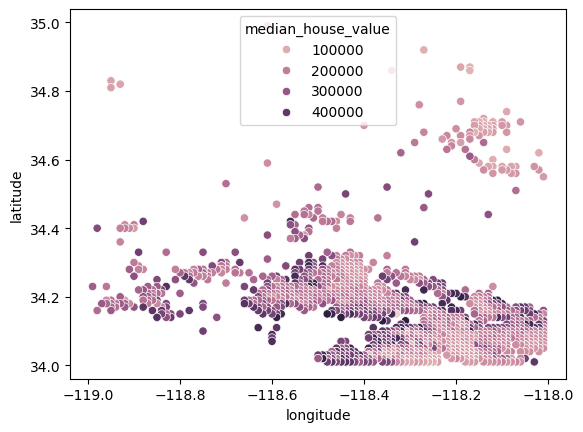

In [26]:
zoomed_house_value=location_house_value[(location_house_value["latitude"] < 35) & (location_house_value["latitude"] > 34) & (location_house_value["longitude"]<-118) & (location_house_value["longitude"]>-119)&(location_house_value["median_house_value"]<500000)]
#zoomed_house_value=location_house_value[(location_house_value["latitude"] < 40) & (location_house_value["longitude"]<-118)]
sns.scatterplot(data=zoomed_house_value,y='latitude',x='longitude',hue='median_house_value')



<Axes: >

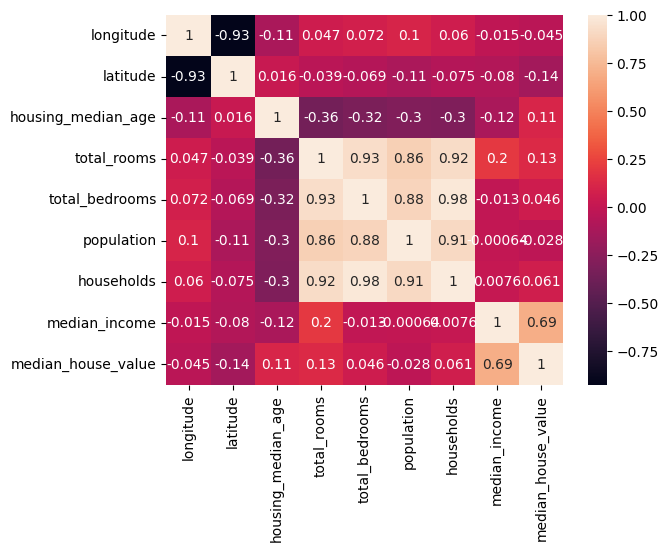

In [27]:
sns.heatmap(data=housing_data.corr(),annot=True)

In [28]:
from sklearn import preprocessing
from sklearn import linear_model

In [29]:
price_reg = linear_model.LinearRegression()

In [30]:
housing_test = pd.read_csv('./data/cali_housing/california_housing_test.csv')

In [31]:
x = housing_data[['longitude', 'latitude', 'housing_median_age', 'total_rooms','total_bedrooms', 'population', 'households', 'median_income']].values

In [32]:
x_scaled = MinMaxScaler().fit_transform(x)

In [33]:
x_scaled

array([[1.        , 0.17534538, 0.2745098 , ..., 0.02836402, 0.07745437,
        0.06853009],
       [0.98406375, 0.19766206, 0.35294118, ..., 0.03155918, 0.07597435,
        0.09104012],
       [0.9750996 , 0.12221041, 0.31372549, ..., 0.00924914, 0.01907581,
        0.07937822],
       ...,
       [0.00498008, 0.98831031, 0.31372549, ..., 0.03478236, 0.07482322,
        0.1745769 ],
       [0.00498008, 0.98405951, 0.35294118, ..., 0.03629586, 0.07844105,
        0.10205376],
       [0.        , 0.8501594 , 1.        , ..., 0.02250624, 0.04423615,
        0.17343209]])

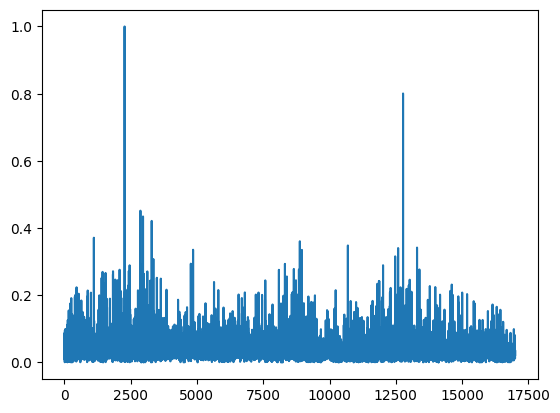

In [34]:
plt.plot(x_scaled[:,5])

In [35]:
y=housing_data['median_house_value'].values

In [68]:
price_reg.fit(X=x,y=y)

LinearRegression()

In [69]:
y_pred = price_reg.predict(x)

In [44]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error

In [70]:
root_mean_squared_error(y,y_pred)

69458.78759326927

In [71]:
mean_value = housing_data['median_house_value'].mean()

In [72]:
y_base = [mean_value]*len(y)

In [73]:
root_mean_squared_error(y,y_base)

115980.35304985354

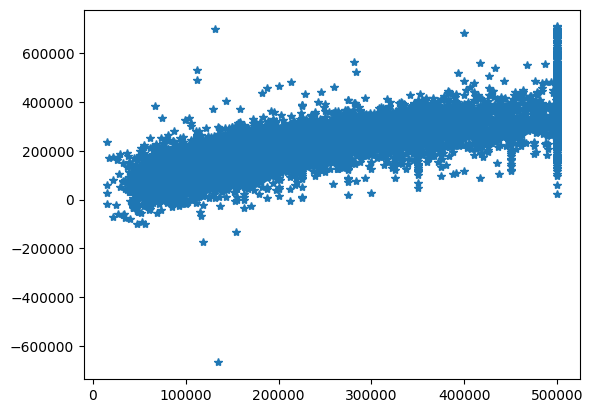

In [74]:
plt.plot(y,y_pred,ls ='',marker='*')

In [75]:
max(y)

500001.0

In [76]:
housing_test.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [77]:
x_test = housing_test[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']].values

In [61]:
x_test_scaled = MinMaxScaler().fit_transform(x_test)

In [78]:
y_test = housing_test['median_house_value'].values

In [79]:
y_pred_test = price_reg.predict(x_test)

In [80]:
root_mean_squared_error(y_test,y_pred_test)

69765.36022216822

In [81]:
y_base_test = [mean_value]*len(y_pred_test)

In [82]:
root_mean_squared_error(y_test,y_base_test)

113110.18658146847